**Importando arquivo .CSV para o Grafo**

['B', 'C', 'D', 'G', 'M', 'R', 'S', 'V']
[[0 2]
 [0 3]
 [0 4]
 [0 5]
 [0 6]
 [1 6]
 [2 3]
 [4 7]
 [5 6]
 [5 7]]


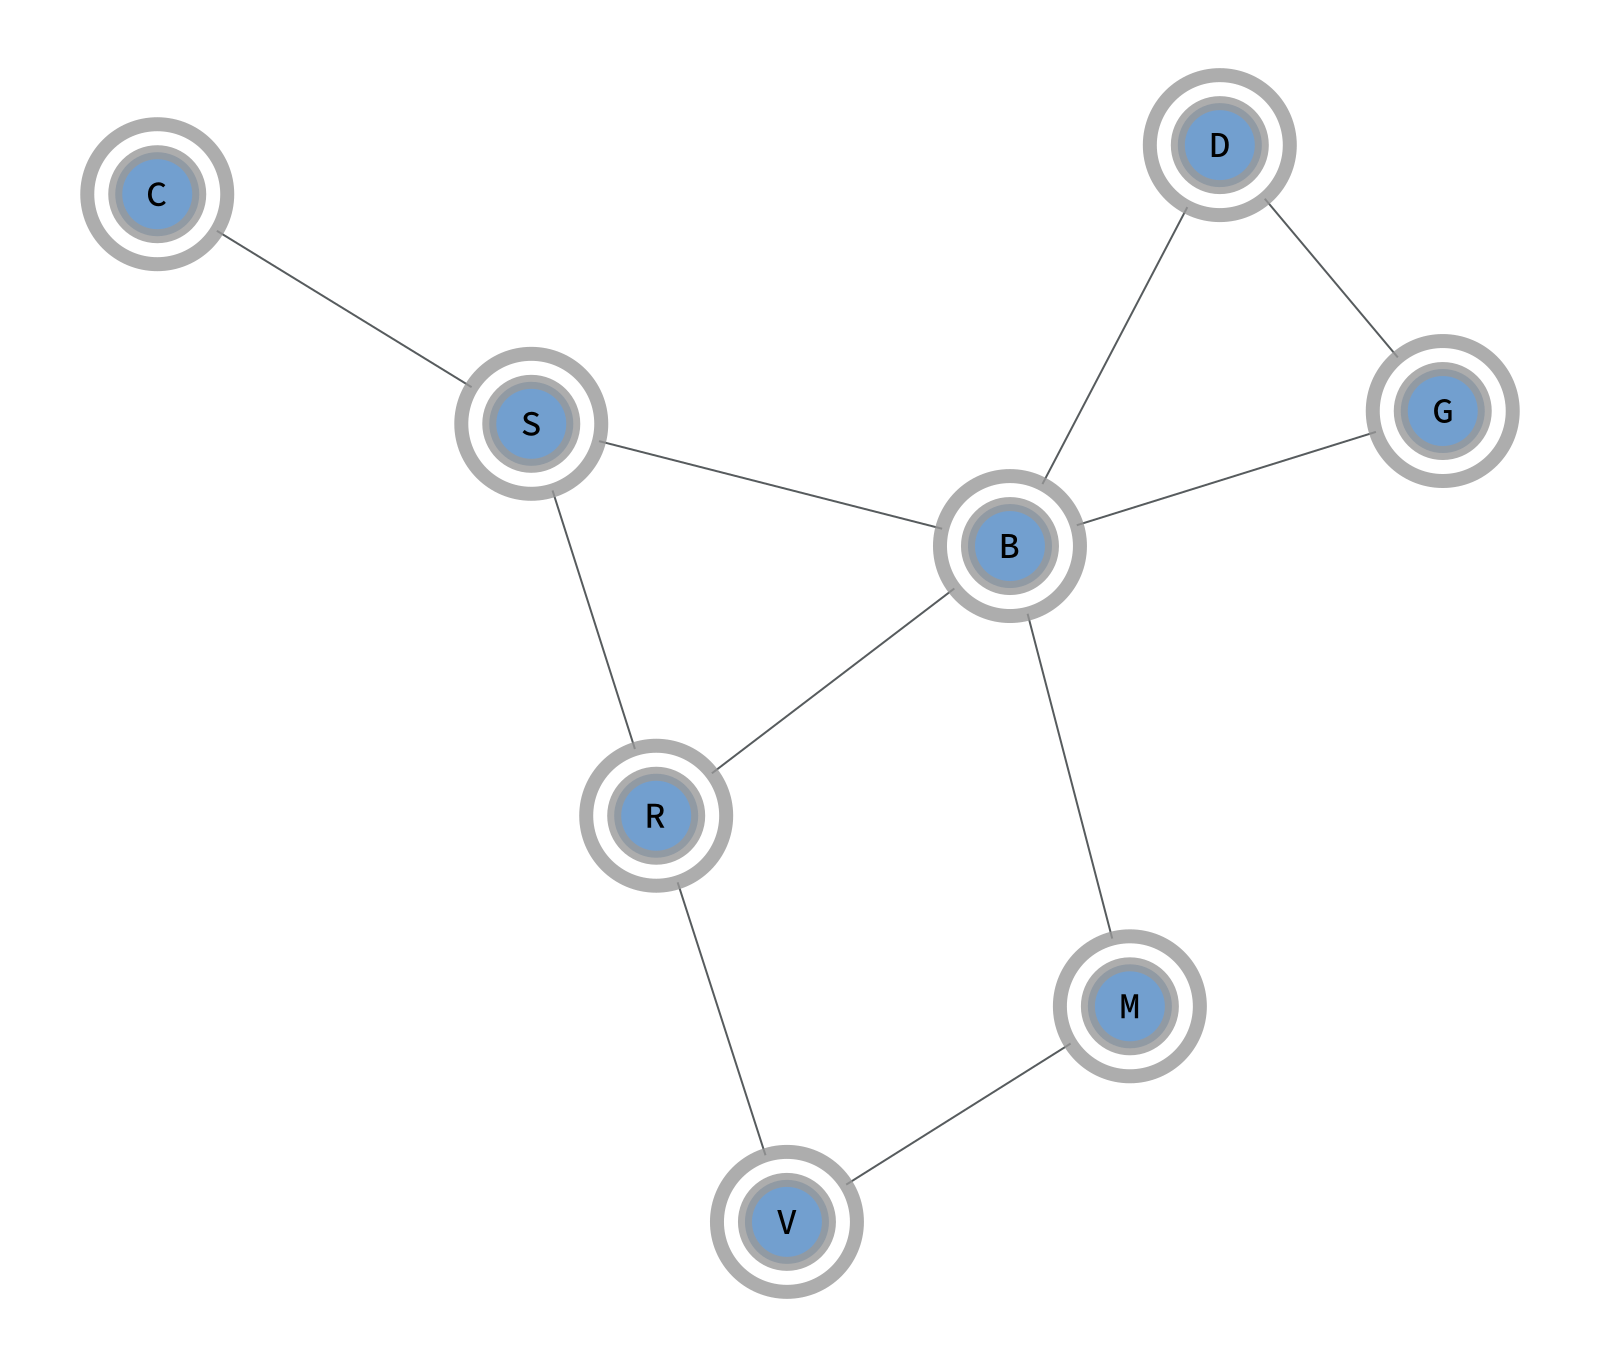

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f934b66adf0, at 0x7f937c5d6be0>

In [8]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(True)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  

#Criação dos vértices no grafo à partir do arquivo .cvs de vértices
f_network = open("vertices.csv", 'r')
reader_network = csv.reader(f_network, delimiter=";")
for vertice in reader_network:
     v = g.add_vertex()
     v_name[v] = str(vertice[1])
f_network.close()
# Lista de vértices criados
print(list(v_name))

#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r')
reader_network = csv.reader(f_network, delimiter=";")
for edge in reader_network:
     g.add_edge(int(edge[0]), int(edge[1]))
f_network.close()
# Lista de arestas criadas
print(g.get_edges())

#Desenhando o grafo
gt.graph_draw(g, #pos=gt.arf_layout(visual_G),
               vertex_text= v_name,
               edge_pen_width = 1,              
               vertex_font_size=18,
               edge_font_size = 10,
               vertex_shape="double_circle",
               vertex_fill_color="#729fcf",
               output_size=(800, 600))
               #output="two-nodes.png")
            

**Busca em Largura - Ordem de Expansão dos Nodos**

B -> D
B -> G
B -> M
B -> R
B -> S
M -> V
S -> C


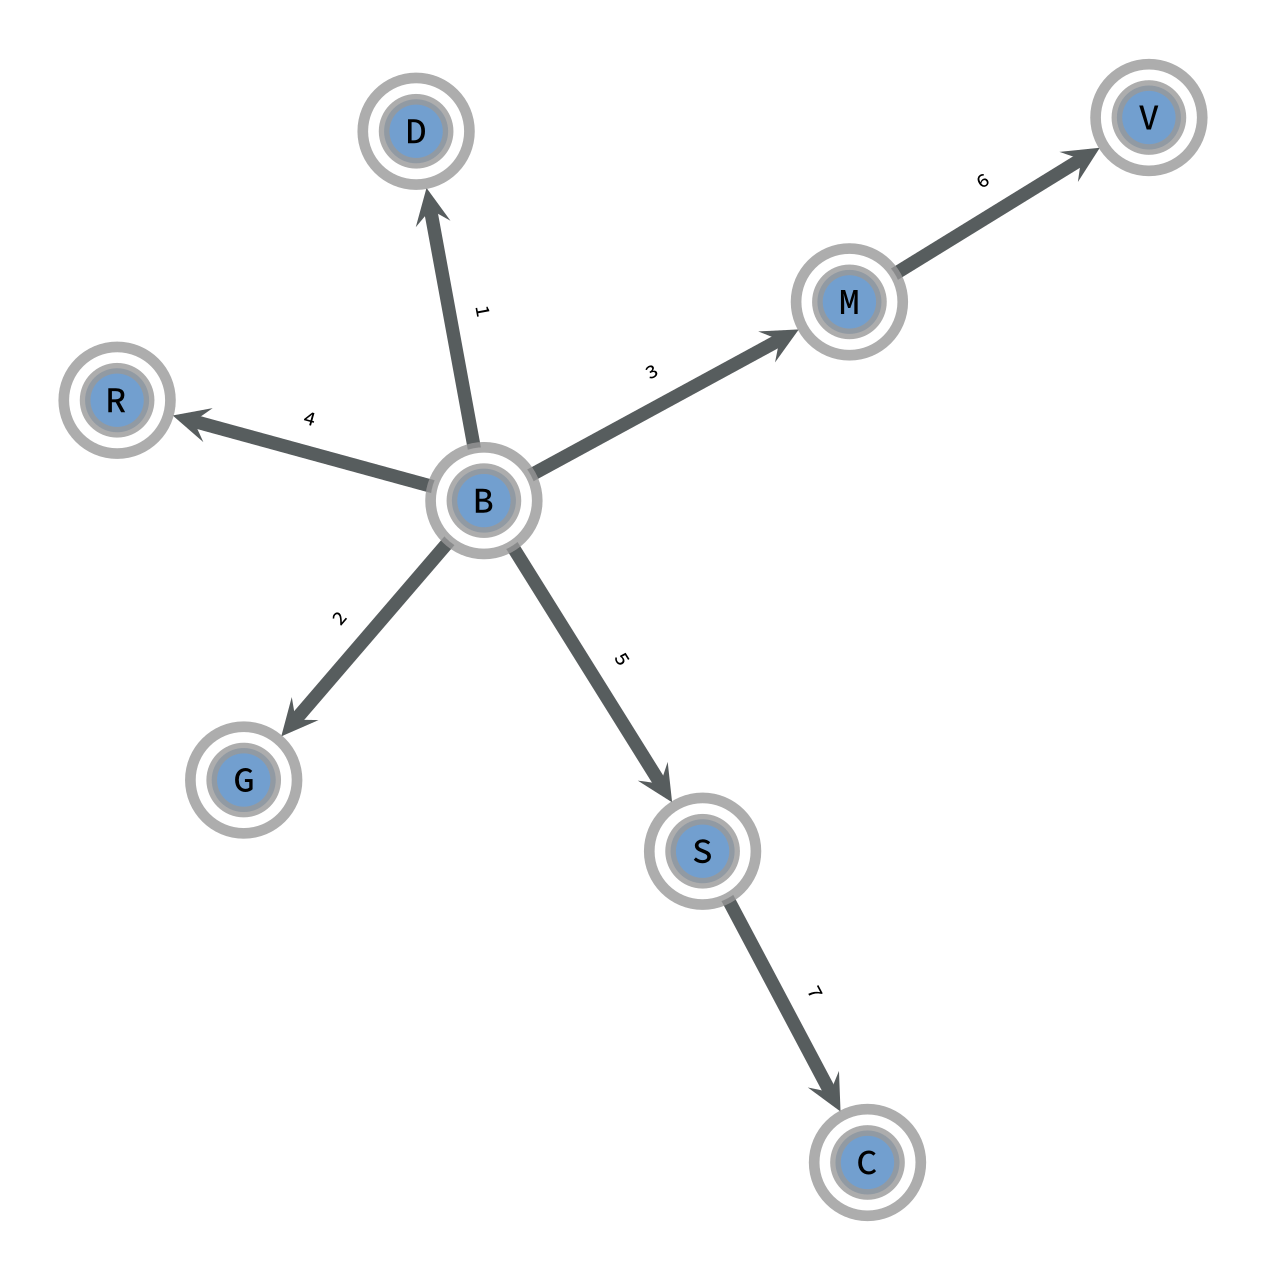

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f937c57a3d0, at 0x7f934a446a90>

In [9]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_bfs = gt.Graph()                                    # criação do objeto para busca em Largura
v_name_bfs = g_bfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_bfs.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int

#Criação dos vértices no grafo à partir do arquivo .cvs de vértices
f_network = open("vertices.csv", 'r')
reader_network = csv.reader(f_network, delimiter=";")
for vertice in reader_network:
     v = g_bfs.add_vertex()
     v_name_bfs[v] = str(vertice[1])
f_network.close()

#Busca em Largura (dfs) e geração das arestas
ord = 1
for edge in gt.bfs_iterator(g, g.vertex(0)):
   print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
   e = g_bfs.add_edge(int(edge.source()), int(edge.target()))
   e_ord[e] = ord
   ord += 1

#Desenhando o grafo
size = 800
v_size = size / 15
e_pwidth = v_size / 8
gt.graph_draw(g_bfs, #pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= v_name_bfs,
              edge_text= e_ord,
              vertex_font_size=18,
              edge_font_size = 10,
              edge_pen_width = e_pwidth,
              vertex_shape="double_circle",
              vertex_fill_color="#729fcf",
              output_size=(size, size*0.8))
              #output="two-nodes.png")           


**Busca em Largura - Busca e Apresentação do Caminho**

In [10]:
class VisitorExample(gt.BFSVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo bfs_search()

    def __init__(self, name, pred, dist, time, name_time, color, v_color):
        self.name = name
        self.pred = pred
        self.dist = dist
        self.time = time
        self.name_time = name_time
        self.last_time = 0
        self.color = color
        self.fill_color = v_color

    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"

    def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
        print(self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def tree_edge(self, e):                                                     # Invocado em cada aresta à medida que se torna um 
        self.pred[e.target()] = int(e.source())                                 # membro das arestas que formam a árvore de pesquisa.
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_bfs.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"

    def finish_vertex(self, u):
        print("Todos os vértices adjacentes à", self.name[u], "foram descobertos!") 


---------------------------------------------
> Busca em Largura - Caminhamento pelos Estados
---------------------------------------------

--> D foi encontrado e entrou na FILA
D saiu da FILA e está sendo analisado (expandido)...
--> G foi encontrado e entrou na FILA
--> B foi encontrado e entrou na FILA
Todos os vértices adjacentes à D foram descobertos!
G saiu da FILA e está sendo analisado (expandido)...
Todos os vértices adjacentes à G foram descobertos!
B saiu da FILA e está sendo analisado (expandido)...
--> M foi encontrado e entrou na FILA
--> R foi encontrado e entrou na FILA
--> S foi encontrado e entrou na FILA
Todos os vértices adjacentes à B foram descobertos!
M saiu da FILA e está sendo analisado (expandido)...
--> V foi encontrado e entrou na FILA
Todos os vértices adjacentes à M foram descobertos!
R saiu da FILA e está sendo analisado (expandido)...
Todos os vértices adjacentes à R foram descobertos!
S saiu da FILA e está sendo analisado (expandido)...
--> C foi encon

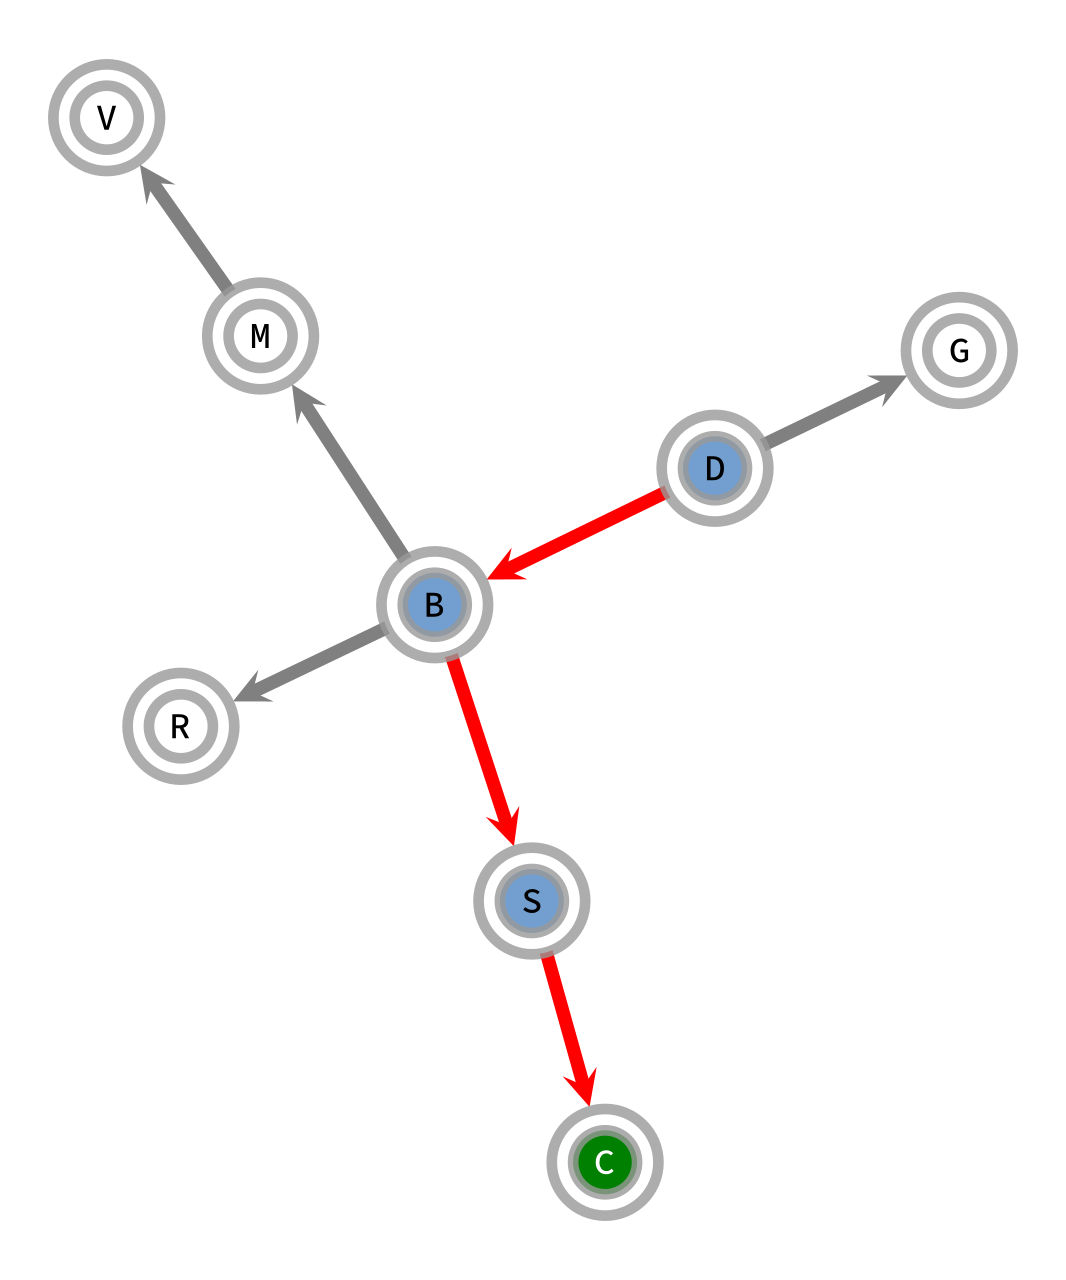

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7eff63e306a0, at 0x7eff95054970>

In [5]:
#Busca em Largura (bfs) e geração das arestas
g_bfs = gt.Graph()                                      # criação do objeto para busca em Largura
v_name_bfs   = g_bfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
v_name_time  = g_bfs.new_vertex_property("string")      # referenciação da lista timed com uma nova propriedade da aresta criada para a ordem de expansão - tipo int
dist         = g_bfs.new_vertex_property("int")         # referenciação da lista dist como uma propriedade do vértice criada para a distância da raiz
pred         = g_bfs.new_vertex_property("int64_t")     # referenciação da lista pred como uma propriedade do vétice criada para referenciar o predecessor (pai)
time         = g_bfs.new_vertex_property("int")         # referenciação da lista timed com uma nova propriedade da aresta criada para a ordem de expansão - tipo int
color        = g_bfs.new_edge_property("string")        # referenciação da lista ecolor com uma nova propriedade criada para a aresta - tipo string  
v_color      = g_bfs.new_vertex_property("string")    # referenciação da lista ecolor com uma nova propriedade criada para o vértice - tipo string  

print("---------------------------------------------")
print("> Busca em Largura - Caminhamento pelos Estados")
print("---------------------------------------------\n")
raiz = 'A'
alvo = 'AI'
index_raiz = list(v_name).index(raiz)

gt.bfs_search(g, g.vertex(index_raiz), VisitorExample(v_name_bfs, pred, dist, time, v_name_time, color, v_color))
print("\n> Informações relevantes:")
print("-----------------------------\n")
print("Espaço de Estados......:", list(v_name_bfs))
print("Ordem de Expansão......:", list(time))
print("Estados e Ordem de Exp.:", list(v_name_time))
print("Precedessores..........:", list(pred))
print("Distância da raiz......:", list(dist))
print("Cores Arestas..........:", list(color))

print("\n> Procura de um Estado e Caminho:")
print("-----------------------------\n")
index = list(v_name_bfs).index(alvo)                     # Localizando o índice do Estado a ser encontrado
path = []                                                # array do caminho
path.insert(0,v_name_bfs[index])                         # inserções sendo realizadas no início
v_color[index] = "green"
while index != index_raiz:
  e = g_bfs.edge(pred[index], index)
  color[e] = "red"
  index = pred[index]
  path.insert(0,v_name_bfs[index])
  v_color[index] = "#729fcf"
v_color[index_raiz] = "#729fcf"; print("Cores Vértices.........:", list(v_color))

print("Caminho encontrado.....:",path)                   # mostrando o caminho encontrado da raiz ao alvo

#Desenhando o grafo
size = 800
v_size = size / 15
e_pwidth = v_size / 8
gt.graph_draw(g_bfs, #pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= v_name_bfs,
              #edge_text= time,
              edge_color= color,
              vertex_font_size=18,
              edge_font_size = 10,
              edge_pen_width = e_pwidth,
              vertex_fill_color=v_color,              
              vertex_shape="double_circle",
              #vertex_fill_color="#729fcf",
              output_size=(size, size*0.8))
              #output="two-nodes.png")    
